<a href="https://colab.research.google.com/github/Shreya-web226/Tems.tech.solution/blob/main/Data_Driven_Investment_Decisions_in_the_Finance_Sector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

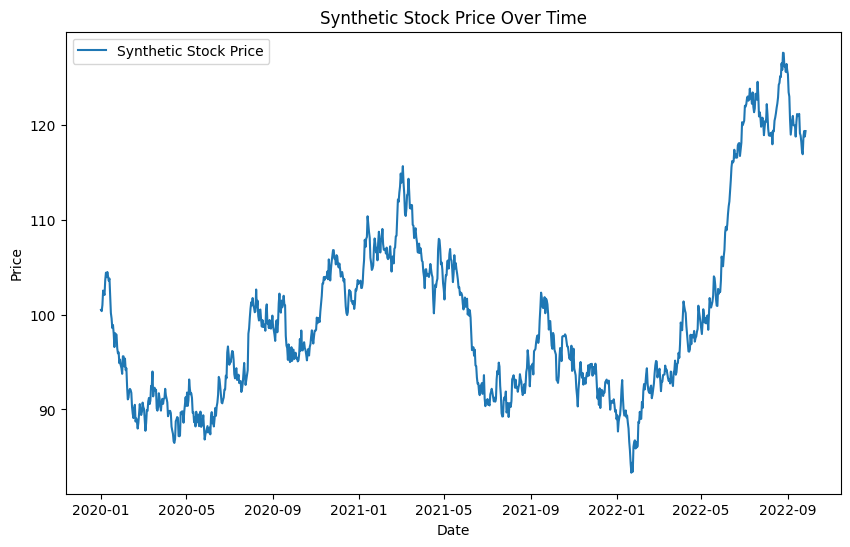

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


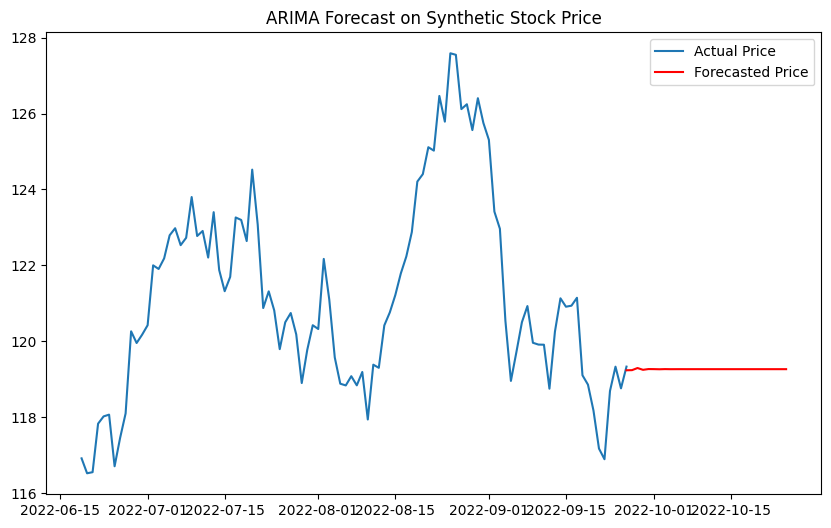

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Generate synthetic stock price data (1000 days of random prices)
np.random.seed(42)
dates = pd.date_range('2020-01-01', periods=1000)
prices = np.cumsum(np.random.randn(1000)) + 100  # Random walk to simulate stock prices

# Create DataFrame
df = pd.DataFrame({'Date': dates, 'Price': prices}).set_index('Date')

# Plot synthetic data
plt.figure(figsize=(10,6))
plt.plot(df['Price'], label='Synthetic Stock Price')
plt.title('Synthetic Stock Price Over Time')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

# ARIMA model on synthetic data
model = ARIMA(df['Price'], order=(5,1,0))  # ARIMA (p=5, d=1, q=0)
model_fit = model.fit()

# Forecasting the next 30 steps
forecast = model_fit.forecast(steps=30)

# Plot actual vs forecasted prices
plt.figure(figsize=(10,6))
plt.plot(df.index[-100:], df['Price'][-100:], label='Actual Price')
plt.plot(pd.date_range(df.index[-1], periods=30, freq='D'), forecast, label='Forecasted Price', color='red')
plt.title('ARIMA Forecast on Synthetic Stock Price')
plt.legend()
plt.show()


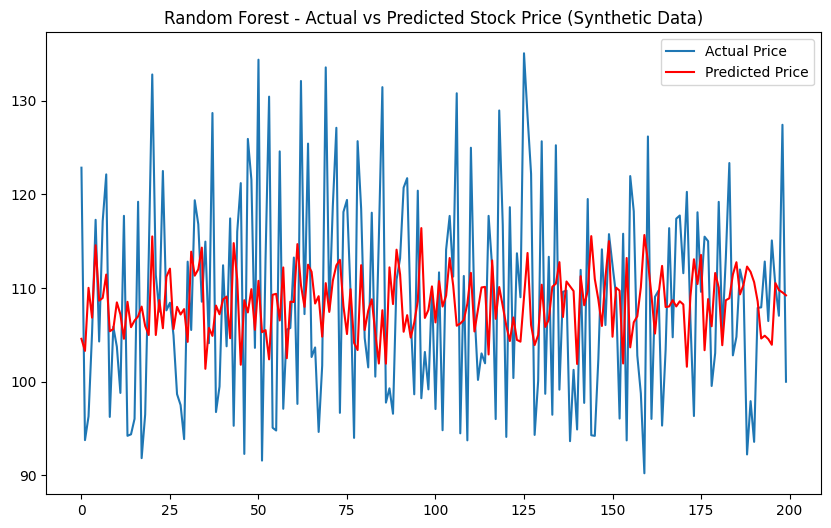

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# Generate synthetic stock data
np.random.seed(42)
n_samples = 1000
features = np.random.rand(n_samples, 4)  # Simulate 4 features (Open, High, Low, Volume)
target = np.cumsum(np.random.randn(n_samples)) + 100  # Simulate stock Close prices

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Plot Actual vs Predicted prices
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual Price')
plt.plot(y_pred, label='Predicted Price', color='red')
plt.title('Random Forest - Actual vs Predicted Stock Price (Synthetic Data)')
plt.legend()
plt.show()


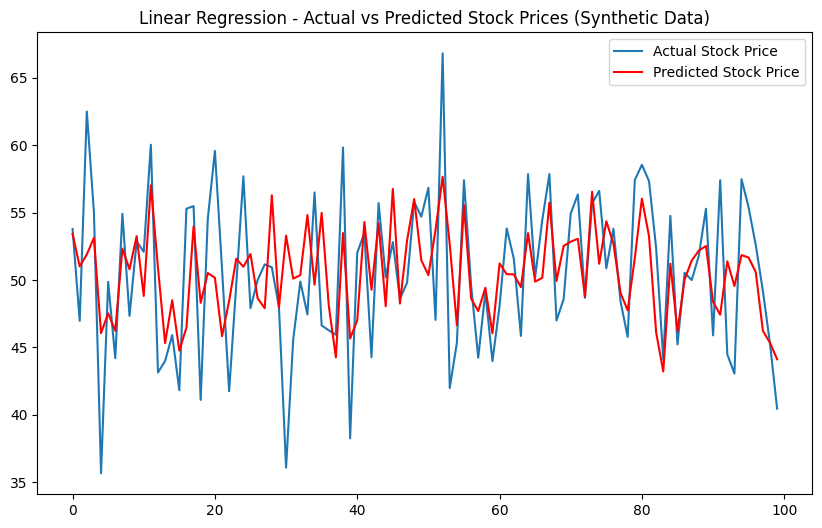

Regression Coefficients (Inflation, Interest Rate, Unemployment): [ 0.70796463 -1.29145028  0.46467409]


In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic economic indicators and stock prices
np.random.seed(42)
n_samples = 100
inflation = np.random.rand(n_samples) * 10  # Random inflation rates between 0-10%
interest_rate = np.random.rand(n_samples) * 5  # Random interest rates between 0-5%
unemployment_rate = np.random.rand(n_samples) * 10  # Random unemployment rates
stock_price = 50 + (inflation * 0.5) - (interest_rate * 1.5) + (unemployment_rate * 0.3) + np.random.randn(n_samples) * 5

# Prepare the data (features and target)
X = np.column_stack((inflation, interest_rate, unemployment_rate))
y = stock_price

# Fit a linear regression model
reg_model = LinearRegression()
reg_model.fit(X, y)

# Predictions
y_pred = reg_model.predict(X)

# Plot Actual vs Predicted Stock Prices
plt.figure(figsize=(10,6))
plt.plot(y, label='Actual Stock Price')
plt.plot(y_pred, label='Predicted Stock Price', color='red')
plt.title('Linear Regression - Actual vs Predicted Stock Prices (Synthetic Data)')
plt.legend()
plt.show()

# Display the coefficients
print("Regression Coefficients (Inflation, Interest Rate, Unemployment):", reg_model.coef_)
